# Importing Libraries

In [1]:
from importlib import import_module
import sklearn
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import time

#importing train_test_split from sklearn
from sklearn.model_selection import train_test_split

#importing oneHotEncoder and column transformer for converting text to numeric data and transforming the columns
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

# Importing all the regressor

In [2]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import BaggingRegressor
from sklearn.neural_network import MLPRegressor

# Importing dataset and creating X and y's for training and testing

In [3]:
agds = pd.read_csv("data/agriculturalDataset.csv")
agds["area"].fillna(agds["area"].mean(),
                                     inplace=True)

X = agds.drop(["aus", "aman", "boro", "wheat", "potato", "jute"], axis = 1)
aus_y = agds["aus"]
aman_y = agds["aman"]
boro_y = agds["boro"]
wheat_y = agds["wheat"]
potato_y = agds["potato"]
jute_y = agds["jute"]

# Transforming columns which holds string values

In [4]:
#transforming our dataframe cells which have text values, converting them to numbers
categorical_features = ["District", "storm"]
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot",
                                   one_hot,
                                   categorical_features)],
                                   remainder="passthrough")

transformed_X = transformer.fit_transform(X)

# Create Train and Test data
## List of target
* Aus
* Aman
* Boro
* Wheat
* Potato
* Jute

In [5]:
#Creating train data and test data
aus_X_train, aus_X_test, aus_y_train, aus_y_test = train_test_split(transformed_X, aus_y, test_size=0.2)
aman_X_train, aman_X_test, aman_y_train, aman_y_test = train_test_split(transformed_X, aman_y, test_size=0.2)
boro_X_train, boro_X_test, boro_y_train, boro_y_test = train_test_split(transformed_X, boro_y, test_size=0.2)
wheat_X_train, wheat_X_test, wheat_y_train, wheat_y_test = train_test_split(transformed_X, wheat_y, test_size=0.2)
potato_X_train, potato_X_test, potato_y_train, potato_y_test = train_test_split(transformed_X, potato_y, test_size=0.2)
jute_X_train, jute_X_test, jute_y_train, jute_y_test = train_test_split(transformed_X, jute_y, test_size=0.2)

In [18]:
models = {"RandomForestRegressor": RandomForestRegressor(),
         "KNeighborsRegressor": KNeighborsRegressor(),
         "GradientBoostingRegressor": GradientBoostingRegressor(),
         "AdaBoostRegressor": AdaBoostRegressor(),
         "DecisionTreeRegressor": DecisionTreeRegressor(),
         "MLPRegressor": MLPRegressor(max_iter=10000)}

results_for_aus = {}
results_for_aman = {}
results_for_boro = {}
results_for_wheat = {}
results_for_potato = {} 
results_for_jute = {}

exec_time_for_aus = {}
exec_time_for_aman = {}
exec_time_for_boro = {}
exec_time_for_wheat = {}
exec_time_for_potato = {}
exec_time_for_jute = {}

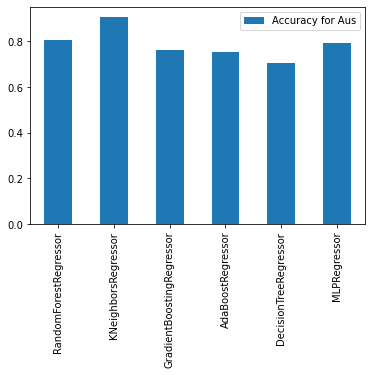

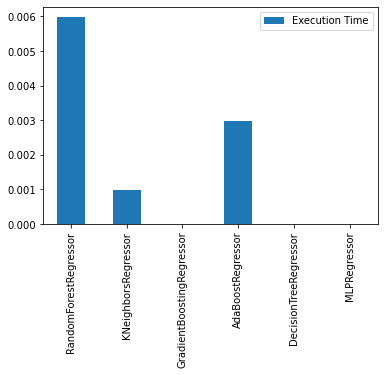

In [25]:
np.random.seed(3)

for model_name, model in models.items():
    model.fit(aus_X_train, aus_y_train)
    start_time = time.time()
    model.predict(aus_X_test)
    end_time = time.time()
    exec_time_for_aus[model_name] = (end_time - start_time)
    results_for_aus[model_name] = model.score(aus_X_test, aus_y_test)

dataframe_of_aus_accuracy_result = pd.DataFrame(results_for_aus.values(),
                          results_for_aus.keys(),
                          columns=["Accuracy for Aus"])
dataframe_of_aus_accuracy_result.plot.bar();

#something

dataframe_results_of_exec = pd.DataFrame(exec_time_for_aus.values(),
                          exec_time_for_aus.keys(),
                          columns=["Execution Time"])
dataframe_results_of_exec.plot.bar();

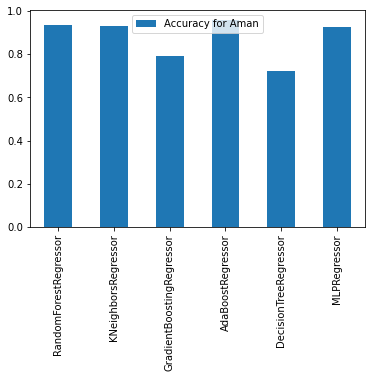

In [8]:
np.random.seed(3)

for model_name, model in models.items():
    model.fit(aman_X_train, aman_y_train)
    results_for_aman[model_name] = model.score(aman_X_test, aman_y_test)
    
dataframe_of_aman_accuracy_result = pd.DataFrame(results_for_aman.values(),
                          results_for_aman.keys(),
                          columns=["Accuracy for Aman"])
dataframe_of_aman_accuracy_result.plot.bar();

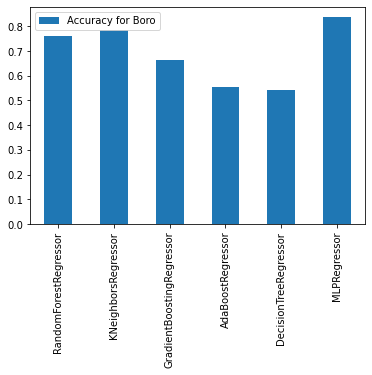

In [9]:
np.random.seed(3)

for model_name, model in models.items():
    model.fit(boro_X_train, boro_y_train)
    results_for_boro[model_name] = model.score(boro_X_test, boro_y_test)
    
dataframe_of_boro_accuracy_result = pd.DataFrame(results_for_boro.values(),
                          results_for_boro.keys(),
                          columns=["Accuracy for Boro"])
dataframe_of_boro_accuracy_result.plot.bar();

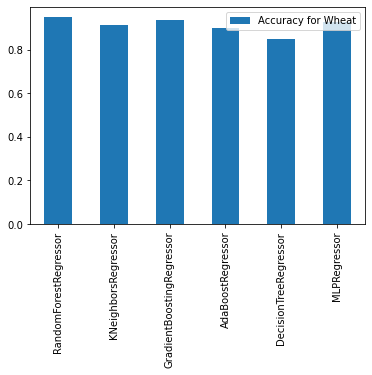

In [10]:
np.random.seed(3)

for model_name, model in models.items():
    model.fit(wheat_X_train, wheat_y_train)
    results_for_wheat[model_name] = model.score(wheat_X_test, wheat_y_test)
dataframe_of_wheat_accuracy_result = pd.DataFrame(results_for_wheat.values(),
                          results_for_wheat.keys(),
                          columns=["Accuracy for Wheat"])
dataframe_of_wheat_accuracy_result.plot.bar();

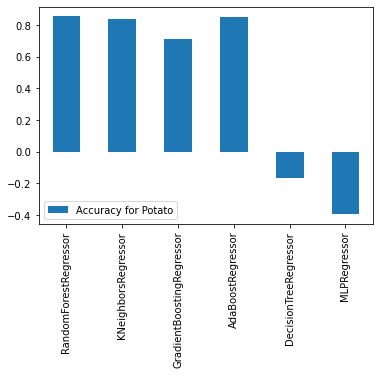

In [11]:
np.random.seed(3)

for model_name, model in models.items():
    model.fit(potato_X_train, potato_y_train)
    results_for_potato[model_name] = model.score(potato_X_test, potato_y_test)

dataframe_of_potato_accuracy_result = pd.DataFrame(results_for_potato.values(),
                          results_for_potato.keys(),
                          columns=["Accuracy for Potato"])
dataframe_of_potato_accuracy_result.plot.bar();

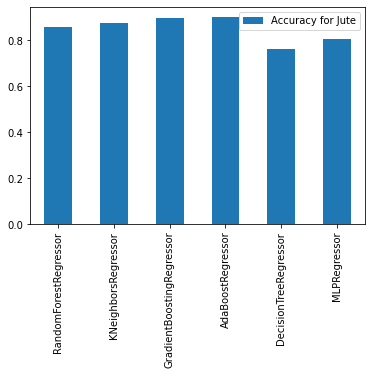

In [12]:
np.random.seed(3)

for model_name, model in models.items():
    model.fit(jute_X_train, jute_y_train)
    results_for_jute[model_name] = model.score(jute_X_test, jute_y_test)

dataframe_of_jute_accuracy_result = pd.DataFrame(results_for_jute.values(),
                          results_for_jute.keys(),
                          columns=["Accuracy for Jute"])
dataframe_of_jute_accuracy_result.plot.bar();